In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('prices_round_3_day_1.csv',index_col='timestamp', sep=';')

In [3]:
df

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,1,GIFT_BASKET,71108,12,71107.0,27.0,NaN,NaN,71121,12,71122.0,27.0,NaN,NaN,71114.5,0.0
0,1,CHOCOLATE,7987,104,NaN,NaN,NaN,NaN,7989,104,NaN,NaN,NaN,NaN,7988.0,0.0
0,1,ROSES,14545,27,14544.0,34.0,NaN,NaN,14546,61,NaN,NaN,NaN,NaN,14545.5,0.0
0,1,STRAWBERRIES,4030,237,NaN,NaN,NaN,NaN,4031,237,NaN,NaN,NaN,NaN,4030.5,0.0
100,1,STRAWBERRIES,4030,52,4029.0,137.0,NaN,NaN,4031,189,NaN,NaN,NaN,NaN,4030.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999800,1,STRAWBERRIES,4035,211,NaN,NaN,NaN,NaN,4036,80,4037.0,131.0,NaN,NaN,4035.5,0.0
999900,1,ROSES,14422,70,NaN,NaN,NaN,NaN,14423,70,NaN,NaN,NaN,NaN,14422.5,0.0
999900,1,STRAWBERRIES,4035,204,NaN,NaN,NaN,NaN,4037,204,NaN,NaN,NaN,NaN,4036.0,0.0


In [4]:
df_chocolate = df.loc[df['product']=='CHOCOLATE'][['mid_price']].rename(columns={'mid_price': 'chocolate'})
df_strawberries = df.loc[df['product']=='STRAWBERRIES'][['mid_price']].rename(columns={'mid_price': 'strawberries'})
df_roses = df.loc[df['product']=='ROSES'][['mid_price']].rename(columns={'mid_price': 'roses'})
df_gift_basket = df.loc[df['product']=='GIFT_BASKET'][['mid_price']].rename(columns={'mid_price': 'gift_basket'})
df = pd.concat([df_chocolate, df_strawberries, df_roses, df_gift_basket], axis=1)
df.columns = pd.MultiIndex.from_product([['mid_price'], df.columns.tolist()])
df

mid_price                                  
          chocolate strawberries    roses gift_basket
timestamp                                            
0            7988.0       4030.5  14545.5     71114.5
100          7988.0       4030.5  14543.5     71114.0
200          7987.5       4030.0  14543.5     71115.5
300          7988.5       4030.0  14541.5     71123.5
400          7989.5       4030.0  14547.5     71132.5
...             ...          ...      ...         ...
999500       7883.0       4036.5  14421.0     70589.5
999600       7885.5       4036.5  14418.0     70599.5
999700       7885.5       4035.5  14421.5     70585.5
999800       7887.5       4035.5  14419.0     70584.5
999900       7887.5       4036.0  14422.5     70586.5

[10000 rows x 4 columns]

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

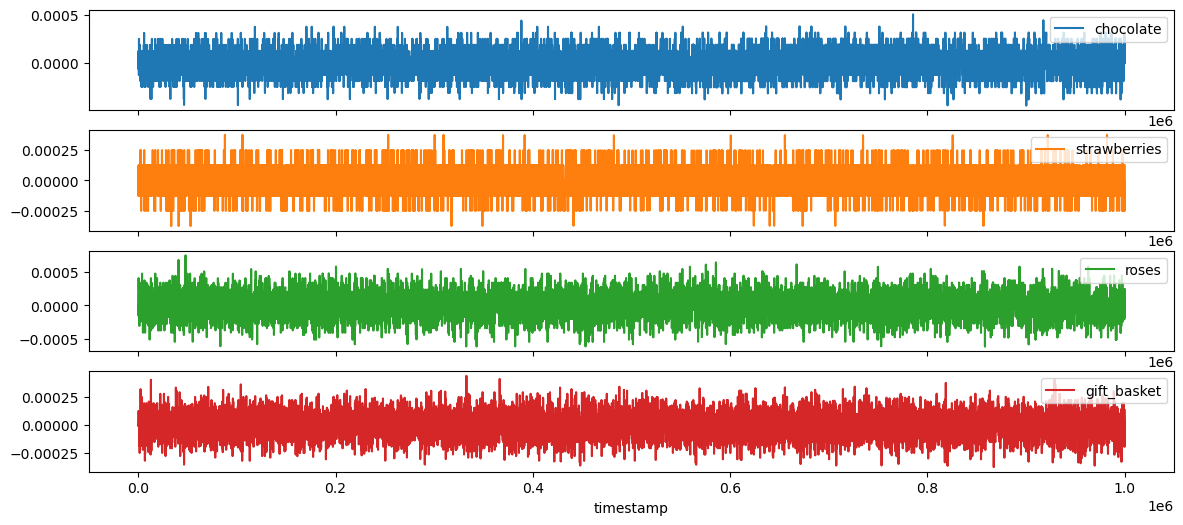

In [5]:
returns = np.log(df['mid_price']/ df['mid_price'].shift(1))
returns.dropna(inplace=True)
returns.plot(subplots=True, figsize=(14,6))

array([[<Axes: xlabel='chocolate', ylabel='chocolate'>,
        <Axes: xlabel='strawberries', ylabel='chocolate'>,
        <Axes: xlabel='roses', ylabel='chocolate'>,
        <Axes: xlabel='gift_basket', ylabel='chocolate'>],
       [<Axes: xlabel='chocolate', ylabel='strawberries'>,
        <Axes: xlabel='strawberries', ylabel='strawberries'>,
        <Axes: xlabel='roses', ylabel='strawberries'>,
        <Axes: xlabel='gift_basket', ylabel='strawberries'>],
       [<Axes: xlabel='chocolate', ylabel='roses'>,
        <Axes: xlabel='strawberries', ylabel='roses'>,
        <Axes: xlabel='roses', ylabel='roses'>,
        <Axes: xlabel='gift_basket', ylabel='roses'>],
       [<Axes: xlabel='chocolate', ylabel='gift_basket'>,
        <Axes: xlabel='strawberries', ylabel='gift_basket'>,
        <Axes: xlabel='roses', ylabel='gift_basket'>,
        <Axes: xlabel='gift_basket', ylabel='gift_basket'>]], dtype=object)

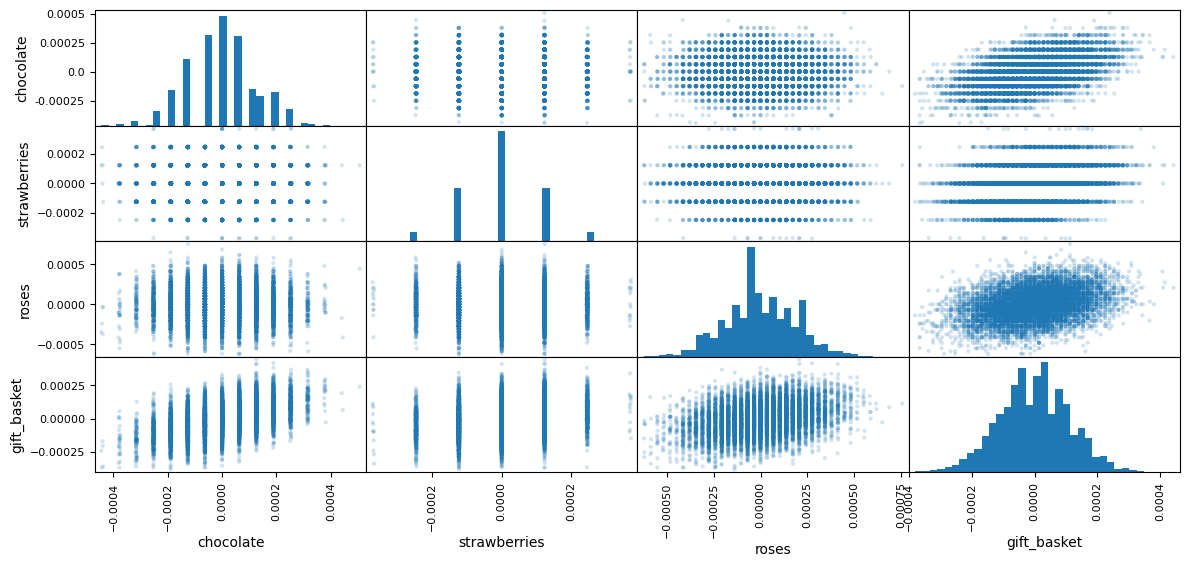

In [6]:
pd.plotting.scatter_matrix(returns, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(14,6))

<Axes: >

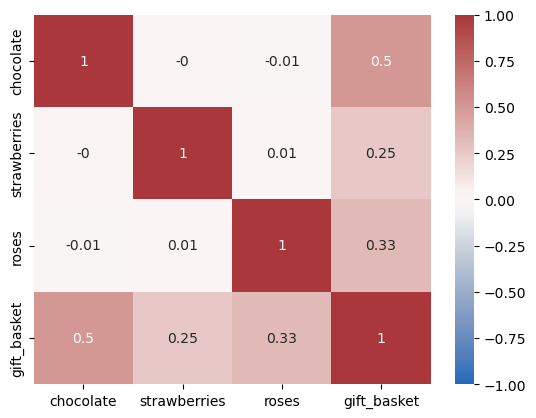

In [7]:
sns.heatmap(returns.corr().round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')

In [8]:
returns.corr()

,chocolate,strawberries,roses,gift_basket
chocolate,1.000000,-0.001814,-0.006629,0.495624
strawberries,-0.001814,1.000000,0.010359,0.246077
roses,-0.006629,0.010359,1.000000,0.327299
gift_basket,0.495624,0.246077,0.327299,1.000000
